# Model building

Try to build a model that is able to predict the machine status.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = [15, 5]

from pandas import HDFStore
from sklearn.utils import shuffle
from sklearn.metrics import classification_report, confusion_matrix

## Data
The data is already pre processed (resampled, standardized, NAN filtered, split)

The independed variable (column 'machine_state') has four states, beeing strongly unvalanced.

States:
* NORMAL
* RECOVERING
* FAILING
* AFTERMATH
* BROKEN

In [2]:
hdf = HDFStore('data/preprocessed.h5', mode='r')
training = hdf['training']
validation = hdf['validation']
testing = hdf['testing']
training.head(5)

,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_51,machine_status,hour
timestamp,,,,,,,,,,,,,,,,,,,,,
2018-04-01 00:00:00,0.311941,0.29487,0.542206,1.16923,0.328643,0.227704,0.231598,0.239513,0.342583,0.210478,...,-0.153986,-0.1089,1.128942,0.442501,-0.386217,1.288269,1.330496,0.331656,NORMAL,0
2018-04-01 00:05:00,0.311941,0.29487,0.542206,1.16923,0.328643,0.227704,0.231598,0.239513,0.342583,0.210478,...,-0.153986,-0.1089,1.128942,0.442501,-0.386217,1.288269,1.330496,0.331656,NORMAL,0
2018-04-01 00:10:00,0.311941,0.29487,0.542206,1.16923,0.328643,0.227704,0.231598,0.239513,0.342583,0.210478,...,-0.153986,-0.1089,1.128942,0.442501,-0.386217,1.288269,1.330496,0.331656,NORMAL,0
2018-04-01 00:15:00,0.311941,0.29487,0.542206,1.16923,0.328643,0.227704,0.231598,0.239513,0.342583,0.210478,...,-0.153986,-0.1089,1.128942,0.442501,-0.386217,1.288269,1.330496,0.331656,NORMAL,0
2018-04-01 00:20:00,0.311941,0.29487,0.542206,1.16923,0.328643,0.227704,0.231598,0.239513,0.342583,0.210478,...,-0.153986,-0.1089,1.128942,0.442501,-0.386217,1.288269,1.330496,0.331656,NORMAL,0


In [3]:
xColumns = list(training.columns[training.columns.str.contains('sensor_')])
xColumns += ['hour']
yColumns = 'machine_status'

In [4]:
xTrain, yTrain = training[xColumns], training[yColumns]
xVal, yVal = validation[xColumns], validation[yColumns]
xTest, yTest = testing[xColumns], testing[yColumns]

In [5]:
xTest.shape

(15253, 51)

In [6]:
yTest.shape

(15253,)

In [7]:
xTrain.head(5)

,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,...,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_51,hour
timestamp,,,,,,,,,,,,,,,,,,,,,
2018-04-01 00:00:00,0.311941,0.29487,0.542206,1.16923,0.328643,0.227704,0.231598,0.239513,0.342583,0.210478,...,-0.313809,-0.153986,-0.1089,1.128942,0.442501,-0.386217,1.288269,1.330496,0.331656,0
2018-04-01 00:05:00,0.311941,0.29487,0.542206,1.16923,0.328643,0.227704,0.231598,0.239513,0.342583,0.210478,...,-0.313809,-0.153986,-0.1089,1.128942,0.442501,-0.386217,1.288269,1.330496,0.331656,0
2018-04-01 00:10:00,0.311941,0.29487,0.542206,1.16923,0.328643,0.227704,0.231598,0.239513,0.342583,0.210478,...,-0.313809,-0.153986,-0.1089,1.128942,0.442501,-0.386217,1.288269,1.330496,0.331656,0
2018-04-01 00:15:00,0.311941,0.29487,0.542206,1.16923,0.328643,0.227704,0.231598,0.239513,0.342583,0.210478,...,-0.313809,-0.153986,-0.1089,1.128942,0.442501,-0.386217,1.288269,1.330496,0.331656,0
2018-04-01 00:20:00,0.311941,0.29487,0.542206,1.16923,0.328643,0.227704,0.231598,0.239513,0.342583,0.210478,...,-0.313809,-0.153986,-0.1089,1.128942,0.442501,-0.386217,1.288269,1.330496,0.331656,0


In [8]:
[df.value_counts() for df in [yTrain, yVal, yTest]]

[NORMAL        16159
 RECOVERING     1098
 FAILING         212
 AFTERMATH        96
 BROKEN            4
 Name: machine_status, dtype: int64, NORMAL        9421
 RECOVERING    1650
 FAILING        106
 AFTERMATH       48
 BROKEN           2
 Name: machine_status, dtype: int64, NORMAL       15175
 FAILING         53
 AFTERMATH       24
 BROKEN           1
 Name: machine_status, dtype: int64]

# 0. Model evaluation toolkit
Build a set of tools to evaluate model training progression and performance

In [9]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

def score_results(yTrue, yPred,
                  scores = {'precision': precision_score,
                      'recall': recall_score,
                      'accuracy': accuracy_score,
                      'f1': f1_score} ):
    return {n: fu(yTrue, yPred) for n, fu in scores.items()}


def plot_acc(history, title="Model Accuracy", ax=None):
    if ax is None:
        fig, ax = plt.subplots(nrows=1, ncols=1)        
    ax.plot(history.history['accuracy'])
    ax.plot(history.history['val_accuracy'])
    ax.set_title(title)
    ax.set_ylabel('Accuracy')
    ax.set_xlabel('Epoch')
    ax.legend(['Train', 'Val'], loc='upper left')
    
def plot_loss(history, title="Model Loss", ax=None):
    if ax is None:
        fig, ax = plt.subplots(nrows=1, ncols=1)  
    ax.plot(history.history['loss'])
    ax.plot(history.history['val_loss'])
    ax.set_title(title)
    ax.set_ylabel('Loss')
    ax.set_xlabel('Epoch')
    ax.legend(['Train', 'Val'], loc='upper right')

def plot_training(history):
    fig, axs = plt.subplots(nrows=1, ncols=2)  
    plot_acc(history=history, ax=axs[0])
    plot_loss(history=history, ax=axs[1])
    fig.suptitle('Training Progress')
    
    
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot as plt

def plot_ROC(yTest, yPred, ax=None):
    ns_probs = [0] * len(yPred)
    ns_auc = roc_auc_score(yTest, ns_probs)
    pre_auc = roc_auc_score(yTest, yPred)

    # calculate roc curves
    ns_fpr, ns_tpr, _ = roc_curve(yTest, ns_probs)
    lr_fpr, lr_tpr, thrds = roc_curve(yTest, yPred)
    
    # Calculate metrices
    acc = []
    prec = []
    reca = []
    f1 = []
    for th in thrds:
        tn, fp, fn, tp = confusion_matrix(yTest, yPred > th).ravel()
        acc.append((tp+tn)/(tn+fp+fn+tp))
        prec.append(tp/(tp+fp))
        reca.append(tp/(tp+fn))
        f1.append((2*prec[-1]*reca[-1])/(prec[-1]+reca[-1]))
    
    bThreshold = thrds[np.nanargmax(f1)]
    
    if ax is None:
        fig, ax = plt.subplots(nrows=1, ncols=1)
        
    # plot the roc curve for the model
    ax.plot(ns_fpr, ns_tpr, linestyle='--', label='Random')
    ax.plot(lr_fpr, lr_tpr, marker='.', label='Model')
    #plt.plot(lr_fpr, acc, marker='o', label='accuracy')
    #plt.plot(lr_fpr, f1, marker='o', label='F1')
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    # show the legend
    ax.legend()
    ax.set_title("ROC Curve\nAUC=%.3f, F1 Peak@Threshold %.3f" % (pre_auc, bThreshold))
        # summarize scores
    #print('Random: ROC AUC=%.3f' % (ns_auc))
    #print('\nModel: ROC AUC=%.3f' % (pre_auc))
    #print('\nF1 peak at threshold: %.3f' %(bThreshold))
    return pre_auc, bThreshold, (lr_fpr, lr_tpr, f1)


def plot_confusion_matrix(yTrue, yPred, title='Confusion matrix', display_labels=['NORMAL', 'FAILING'], cmap=plt.cm.Blues, normalize=False, ax=None):
    cm = confusion_matrix(yTrue, yPred)
    if normalize:
        cm = cm / cm.sum()
    if ax is None:
        fig, ax = plt.subplots(nrows=1, ncols=1)
    else:
        fig=ax.get_figure()
    ax.imshow(cm, interpolation='nearest', cmap=cmap)
    
    ax.set_title(title)
    #fig.colorbar()
    tick_marks = np.arange(len(display_labels))
    ax.set_xticks(tick_marks)
    ax.set_yticks(tick_marks)
    ax.set_xticklabels(display_labels, rotation=45)
    ax.set_yticklabels(display_labels)
    
    for (j,i),label in np.ndenumerate(cm):
        ax.text(i,j,cm[i, j],ha='center',va='center')
        #ax.text(i-0.0,j-0.25,cm[i, j])
    ax.set_ylabel('True label')
    ax.set_xlabel('Predicted label')
    
    fig.tight_layout()
    

def show_analysis(yTest, yPred):
    """
    Plot a ROC curve, and use the threshold that produces the highest F1 score
    to plot a confusion matrix
    """
    fig, axs = plt.subplots(nrows=1, ncols=2)
    auc, bT, _ = plot_ROC(yTest, yPred, ax=axs[0])
    plot_confusion_matrix(yTest, yPred>bT, ax=axs[1])
    
def printPrediction(y, pred, thresholds):
    from collections import Iterable
    if not isinstance(thresholds, Iterable):
        thresholds = [thresholds]

    figsize=(plt.rcParams['figure.figsize'][0], plt.rcParams['figure.figsize'][1]*len(thresholds))
    fig, axs = plt.subplots(nrows=len(thresholds), ncols=1, figsize=figsize)
    
    for thr, ax in zip(thresholds, axs):
        predBinarized = np.ravel((pred > thr)*1.0)
        pd.concat([pd.Series(y, name='y'), pd.Series(predBinarized, name='Prediction')], axis=1).plot(alpha=0.5, ax=ax)
        ax.set_title(f'Threshold: {thr}')

# 1. Data preprocessing and balancing classes
Do a new pre processing where we sample from the normal and the failing data by simply randomly selecting a point in time X and get data from X-N:X.

In [20]:
from IPython.core.debugger import set_trace as st

def sampleByIndex(X, Y, N, state, newYValue, sequence_length='30min', index_masking='30min', seed=42):
    """
    Generate a numpy array containing N sequences sampled the given dataset (X and Y).
    
    As input only a subset of the data is used for which Y == state.
    
    Note:
    The index_masking is used in order to make sure that sampling is
    not trying to generate sequences that go beyond the start of the dataset
            
    Parameters
    ----------
    X, Y : pd.Dataframe
        The dataframe containing depended and independed variables
    state :
        Y state of the data to consider
    newYValue :
        Value of the generated Y data
    sequence_length : str
        Pandas Timestamp string defining sequence length
    index_masking : str
        Mask the beginning of the dataset
    seed : int
        define seed for sampling process

    
    Returns
    -------
    np.array : (N, seq_length, nFeatures)
        X sequences
    np.array : N
        Y
    """
    np.random.seed(seed)
    Ymasked = Y.loc[Y.index[0] + pd.Timedelta(index_masking):]
    Iend = np.random.choice(Ymasked[Ymasked == state].index, N)
    # Add one second in order to know hit boundaries which would result in plus one extra element
    Istart = Iend - pd.Timedelta(sequence_length) + pd.Timedelta('1sec')
    
    sequences = []
    for start, end in zip(Istart, Iend):
        try:
            sequences.append(X[start:end].values)
        except Exception as e:
            print('Some error with %s:%s' % (s, e) )
            
    sequences = np.array(sequences)
    
    newY = np.ones(sequences.shape[0]) * newYValue
    return sequences, newY



def createSequenceWithSampling(X, Y, N, sequence_length, seed=42):
    xseq0, yseq0 = sampleByIndex(X, Y, N, 'NORMAL', 0, seed=seed, sequence_length=sequence_length, index_masking=sequence_length)
    xseq1, yseq1 = sampleByIndex(X, Y, N, 'FAILING', 1, seed=seed, sequence_length=sequence_length, index_masking=sequence_length)
    
    xseq = np.concatenate((xseq0, xseq1))
    yseq = np.concatenate((yseq0, yseq1))
    
    xseq = shuffle(xseq, random_state=seed)
    yseq = shuffle(yseq, random_state=seed)
    
    return xseq, yseq


def createSubsequences(X : pd.DataFrame, Y: pd.Series, sequence_length : str='30min') -> (np.ndarray, np.ndarray):
    """
    Split the Dataframe X into a numpy.ndarray with subsequences of specific length.
    
    Parameters
    ----------
    X : pd.Dataframe
        Features
    Y : pd.Series
        Independed varible
    sequence_length : str
        Pandas Timestamp string defining sequence length
    
    Returns
    -------
    np.array : (<N>, seq_length, nFeatures)
        X sequences
    np.array : <N>
        Y corresponding y value for each subsequence
    """
    # Identify sequence length
    N = (X.index < X.index[0]+pd.Timedelta(sequence_length)).sum()

    subsequences = []
    Xv = X.values
    for onset in range(0, Xv.shape[0]-N):
        #print(f'{onset}:{onset+N}')
        subsequences.append((Xv[onset:onset+N]))
            
    subsequences = np.array(subsequences)
    
    newY = Y[N:]
    return subsequences, newY

In [11]:
SAMPLE_SIZE = 50000
TRAINING_R, VALIDATION_R = 0.70, 0.30

seqLength = '30min'

xTrainSeq, yTrainSeq = createSequenceWithSampling(xTrain, yTrain, int(SAMPLE_SIZE/2 * TRAINING_R), seqLength)
xValidSeq, yValidSeq = createSequenceWithSampling(xVal, yVal, int(SAMPLE_SIZE/2 * VALIDATION_R), seqLength)
#xTestSeq, yTestSeq = createSequenceWithSampling(xTest, yTest, int(SAMPLE_SIZE/2 * TESTING_R), seqLength)

xTrainSeq.shape

(35000, 6, 51)

## Check the repeated sampling sequence frequencies

In [12]:
def sequenceCounts(sequences):
    seqCnts = {}
    for seq in sequences:        
        k = hash(seq.tostring())
        seqCnts[k] = seqCnts.get(k, 0) + 1
    return seqCnts

def sampleFrequency(sequences):
    seqCnts = sequenceCounts(sequences)
    seqCntsValues = list(seqCnts.values())
    print(f'# of unique sequences = {len(seqCntsValues)}')
    plt.hist(list(seqCnts.values()), density=True, bins=20)

# of unique sequences = 10637


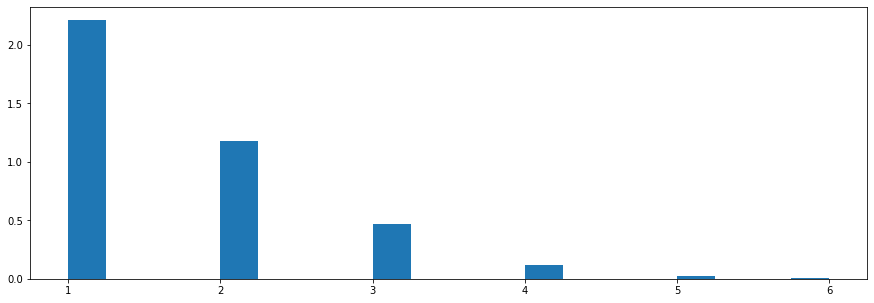

In [13]:
sampleFrequency(xTrainSeq[yTrainSeq == 0])

# of unique sequences = 212


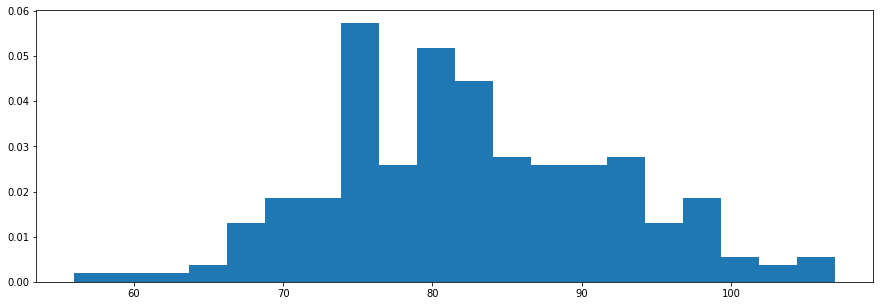

In [14]:
sampleFrequency(xTrainSeq[yTrainSeq == 1])

## Prepare the test data, generating sequences

In [21]:
# FAILING: y == 1
# Rest: y = 0
yTestBin = ((yTest=='FAILING').values).astype(int)
xTestSeq, yTestSeq = createSubsequences(xTest, yTestBin, sequence_length=seqLength)

# of unique sequences = 53


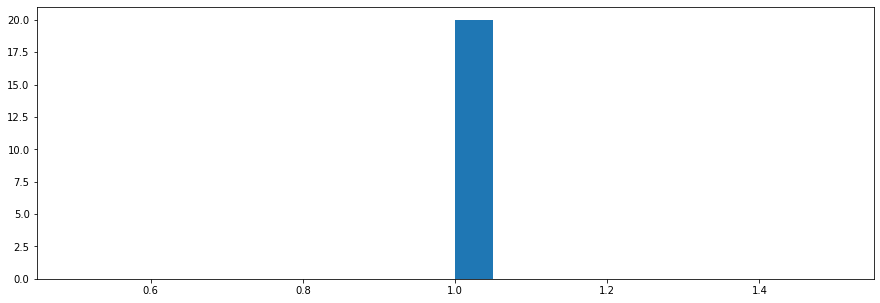

In [22]:
sampleFrequency(xTestSeq[yTestSeq == 1])

# Model

In [23]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.callbacks import EarlyStopping

# Prepare Tensorboard
#%load_ext tensorboard
import datetime, os

logs_base_dir = "./tf-logs/"
os.makedirs(logs_base_dir, exist_ok=True)
# %tensorboard --logdir {logs_base_dir}

# 3.1 LSTM Sequence model
Use an LSTM model with a sequence of the sensor values

# 3.2 Regularized LSTM

Add regularization and early stopping

# 3.3 Some fancy Convoluation sequence model
All stolen from
https://machinelearningmastery.com/how-to-develop-rnn-models-for-human-activity-recognition-time-series-classification/

In [24]:
from tensorflow.keras.layers import TimeDistributed
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.regularizers import l1

from functools import partial

regfun = partial(l1, l=10**-2)
optimizerfun = partial(keras.optimizers.Adam, learning_rate=0.00003, beta_1=0.85, beta_2=0.999)

# define model
verbose, epochs, batch_size = 0, 25, 128
n_timesteps, n_features, n_outputs = xTrainSeq.shape[1], xTrainSeq.shape[2], yTrainSeq[0]

# define model
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features), activity_regularizer=regfun()))
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', activity_regularizer=regfun()))
#model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))
#model.add(Flatten())
model.add(LSTM(100, activity_regularizer=regfun()))
#model.add(Dropout(0.5))
model.add(Dense(100, activation='relu', activity_regularizer=regfun()))
#model.add(Dropout(0.5))
model.add(Dense(20, activation='relu', activity_regularizer=regfun()))
#model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer=optimizerfun(), metrics=['accuracy'])

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)

dateposfix = datetime.datetime.now().strftime("%H:%M:%S@%d-%m-%y")
model_name = 'CONV-LSTM'
logs_base_dir = f"./tf-logs/{model_name}-{dateposfix}"
tb_cb = tf.keras.callbacks.TensorBoard(log_dir=logs_base_dir, histogram_freq=1, write_graph=True, write_images=True)

In [25]:
%time history = model.fit(xTrainSeq, yTrainSeq, epochs=50, batch_size=1024, verbose=1, validation_data=(xValidSeq, yValidSeq), callbacks=[tb_cb])

Train on 35000 samples, validate on 15000 samples
Epoch 1/50
35000/35000 [==============================] - 3s 76us/sample - loss: 2.3081 - accuracy: 0.5230 - val_loss: 2.7795 - val_accuracy: 0.5095
Epoch 2/50
35000/35000 [==============================] - 1s 28us/sample - loss: 2.1950 - accuracy: 0.5245 - val_loss: 2.6825 - val_accuracy: 0.4444
Epoch 3/50
35000/35000 [==============================] - 1s 18us/sample - loss: 2.0947 - accuracy: 0.5859 - val_loss: 2.5986 - val_accuracy: 0.3456
Epoch 4/50
35000/35000 [==============================] - 1s 19us/sample - loss: 2.0049 - accuracy: 0.6769 - val_loss: 2.5226 - val_accuracy: 0.2855
Epoch 5/50
35000/35000 [==============================] - 1s 18us/sample - loss: 1.9242 - accuracy: 0.7074 - val_loss: 2.4521 - val_accuracy: 0.2876
Epoch 6/50
35000/35000 [==============================] - 1s 18us/sample - loss: 1.8514 - accuracy: 0.7225 - val_loss: 2.3878 - val_accuracy: 0.2965
Epoch 7/50
35000/35000 [==============================] 

/opt/miniconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:59: RuntimeWarning: invalid value encountered in long_scalars
/opt/miniconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:61: RuntimeWarning: invalid value encountered in double_scalars


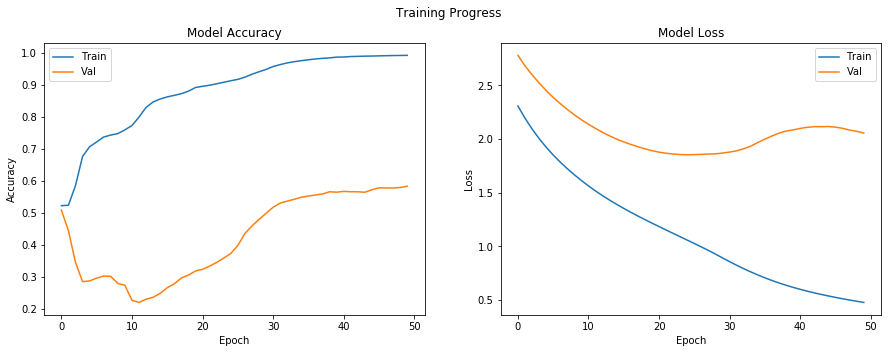

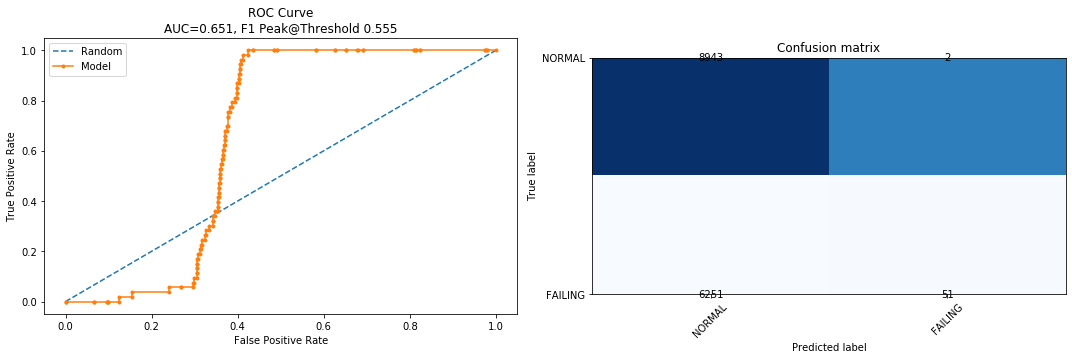

In [26]:
plot_training(history)
yPred = model.predict(xTestSeq)
show_analysis(yTestSeq, yPred)

In [27]:
predSeq = model.predict(xTestSeq)

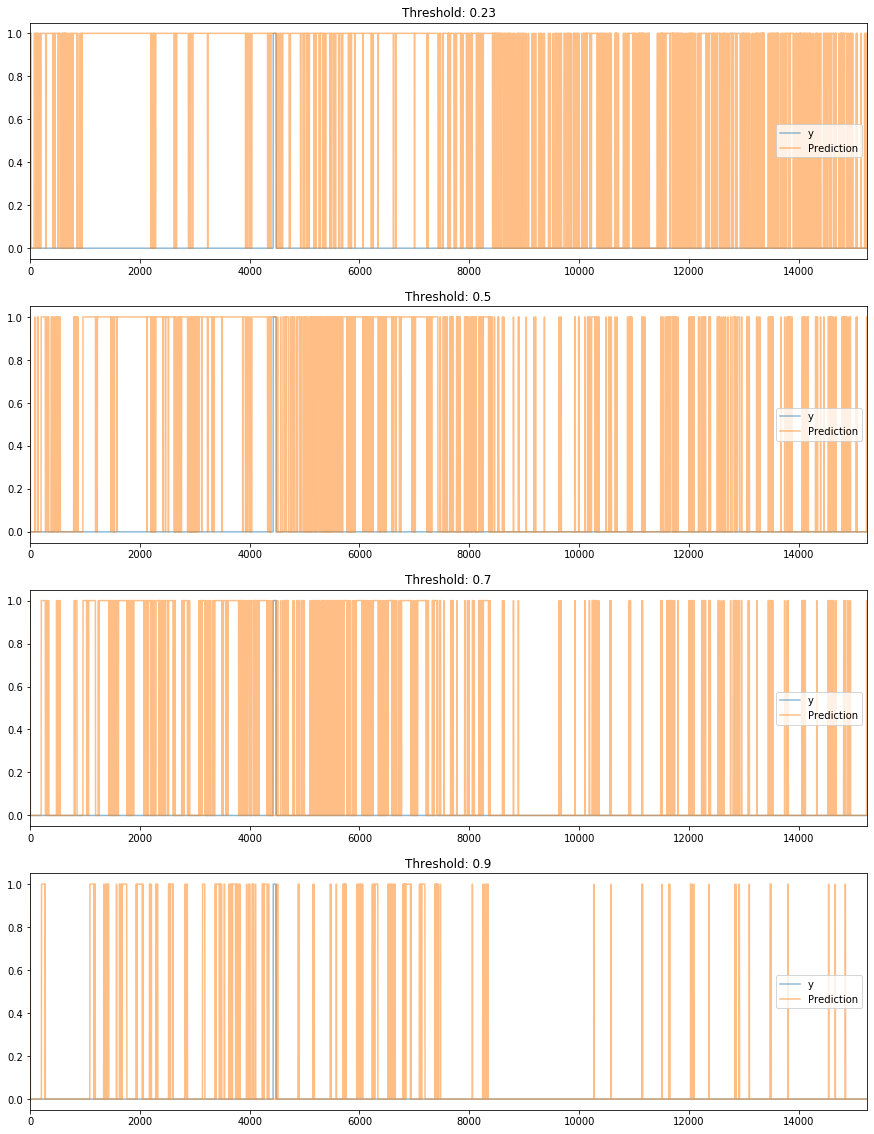

In [29]:
printPrediction(yTestSeq, predSeq, [0.23, 0.5, 0.7, 0.9])